In [1]:
import pandas as pd
import numpy as np
import os
import ase.io as io 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:

dfs = {}
types = []
indir = '/gpfs/home/smdick/smdick/mbpol/'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
#         if 'log' in f and 'verlet' in f and 'keepv' in f:
#         if 'log' in f and 'verlet' in f:
#         if 'log' in f:
#              dfs[f] = pd.read_table('{}/{}'.format(root,f), delim_whitespace=True, index_col = 0)
        types.append((root + f).split(sep='.')[-1])

In [9]:
np.unique(types)

array(['bins', 'bins_bckp', 'errors', 'full_var', 'log', 'log_bckp',
       'time', 'traj', 'traj_bckp', 'xyz'],
      dtype='<U9')

20000 ::  2.5600000000000005
44317 ::  2.559942235660454


TypeError: Empty 'DataFrame': no numeric data to plot

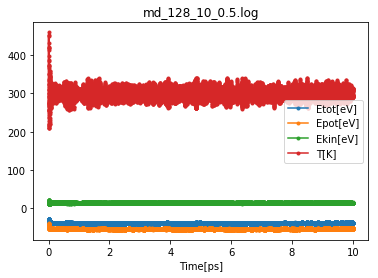

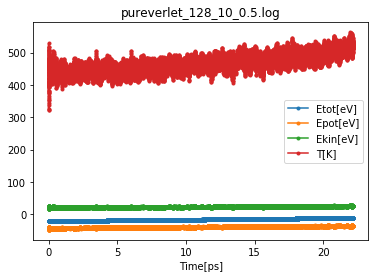

In [5]:
for key in dfs:
    figure()
    dfs[key].plot(ls ='-', marker= '.')
    tmax = dfs[key].index[-1]
    dt = float(key.split(sep='_')[1]) * float(key.split(sep='_')[2])/1e6
    maxsteps = tmax / dt
    n_steps = len(dfs[key].index)
    print("{} ::  {}".format(n_steps,n_steps/maxsteps))
    title(key)

In [6]:
from ase import Atoms

In [29]:
atoms = []
for atom in io.iread('/gpfs/home/smdick/md_routines/verlet_mc_results/verlet300_1000_5_1000_all.traj'):
    
    h2o = Atoms('128OHH',
            positions = atom.get_positions(),
            pbc = True)

    atoms.append(h2o)
    
io.write('/gpfs/home/smdick/md_routines/verlet_mc_results/verlet300_1000_5_1000_all.xyz', atoms)

In [3]:
atoms = io.read('/gpfs/home/smdick/smdick/mbpol/nose_128_10.traj', -1)

In [5]:
atoms.get_pbc()

array([ True,  True,  True], dtype=bool)